In [ ]:
# Import Library
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px

import re
import string
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from collections import Counter
from wordcloud import WordCloud

from sklearn.pipeline import Pipeline
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
!unzip '/content/Dataset.zip' -d './dataset'

Archive:  /content/Dataset.zip
  inflating: ./dataset/movie.csv     


In [ ]:
# Load Data
df = pd.read_csv('/content/dataset/movie.csv')
df.head()

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1


# Explanatory Data Analysis and Visualization

In [ ]:
# Decoder The Label from Dataset
df['label'] = df['label'].replace([0], 'negative')
df['label'] = df['label'].replace([1], 'positive')
df.head()

,text,label
0,I grew up (b. 1965) watching and loving the Th...,negative
1,"When I put this movie in my DVD player, and sa...",negative
2,Why do people who do not know what a particula...,negative
3,Even though I have great interest in Biblical ...,negative
4,Im a die hard Dads Army fan and nothing will e...,positive


In [ ]:
# Show Information of Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    40000 non-null  object
 1   label   40000 non-null  object
dtypes: object(2)
memory usage: 625.1+ KB


In [ ]:
# Show Missing Value from Dataset
df.isnull().sum()

text     0
label    0
dtype: int64

Text(0, 0.5, 'Count')

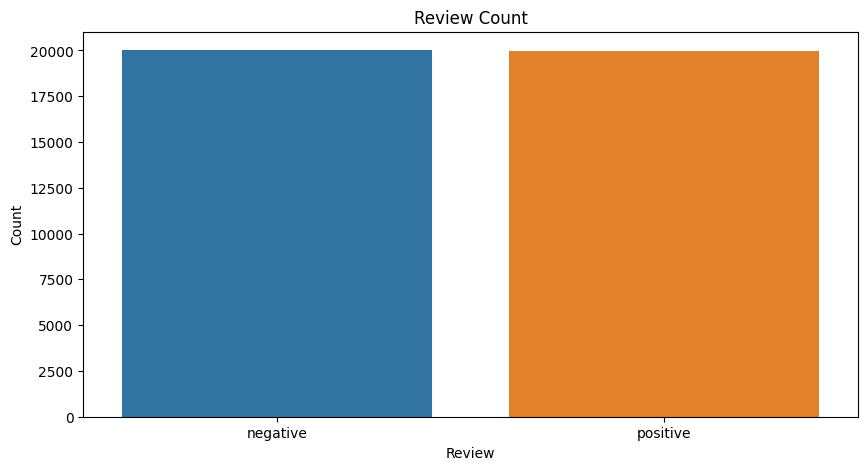

In [ ]:
# Generating a Count Plot for Label
plt.figure(figsize = (10, 5))
sns.barplot(x = df['label'].value_counts().index, y = df['label'].value_counts())
plt.title('Review Count')
plt.xlabel('Review')
plt.ylabel('Count')

# Data Preprocessing

In [ ]:
# Function to Convert Text to Lowercase and Remove Punctuation
def clean_text(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [ ]:
# Show Data
df['clean'] = df['text'].apply(clean_text)
df.head()

,text,label,clean
0,I grew up (b. 1965) watching and loving the Th...,negative,i grew up b watching and loving the thunderbi...
1,"When I put this movie in my DVD player, and sa...",negative,when i put this movie in my dvd player and sat...
2,Why do people who do not know what a particula...,negative,why do people who do not know what a particula...
3,Even though I have great interest in Biblical ...,negative,even though i have great interest in biblical ...
4,Im a die hard Dads Army fan and nothing will e...,positive,im a die hard dads army fan and nothing will e...


In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# Function to Remove Stop Words
sws = stopwords.words('english')

def preprocessdata(text):
    text= ' '.join(word for word in text.split(' ') if word not in sws)
    return text

In [ ]:
# Show Data
df['final'] = df['clean'].apply(preprocessdata)
df.head()

,text,label,clean,final
0,I grew up (b. 1965) watching and loving the Th...,negative,i grew up b watching and loving the thunderbi...,grew b watching loving thunderbirds mates sch...
1,"When I put this movie in my DVD player, and sa...",negative,when i put this movie in my dvd player and sat...,put movie dvd player sat coke chips expectatio...
2,Why do people who do not know what a particula...,negative,why do people who do not know what a particula...,people know particular time past like feel nee...
3,Even though I have great interest in Biblical ...,negative,even though i have great interest in biblical ...,even though great interest biblical movies bor...
4,Im a die hard Dads Army fan and nothing will e...,positive,im a die hard dads army fan and nothing will e...,im die hard dads army fan nothing ever change ...


In [ ]:
# Show Data
df['final2'] = df['final'].apply(lambda x:' '.join(text for text in x.split(' ') if len(text)>2))
df.head()

,text,label,clean,final,final2
0,I grew up (b. 1965) watching and loving the Th...,negative,i grew up b watching and loving the thunderbi...,grew b watching loving thunderbirds mates sch...,grew watching loving thunderbirds mates school...
1,"When I put this movie in my DVD player, and sa...",negative,when i put this movie in my dvd player and sat...,put movie dvd player sat coke chips expectatio...,put movie dvd player sat coke chips expectatio...
2,Why do people who do not know what a particula...,negative,why do people who do not know what a particula...,people know particular time past like feel nee...,people know particular time past like feel nee...
3,Even though I have great interest in Biblical ...,negative,even though i have great interest in biblical ...,even though great interest biblical movies bor...,even though great interest biblical movies bor...
4,Im a die hard Dads Army fan and nothing will e...,positive,im a die hard dads army fan and nothing will e...,im die hard dads army fan nothing ever change ...,die hard dads army fan nothing ever change got...


Word Cloud

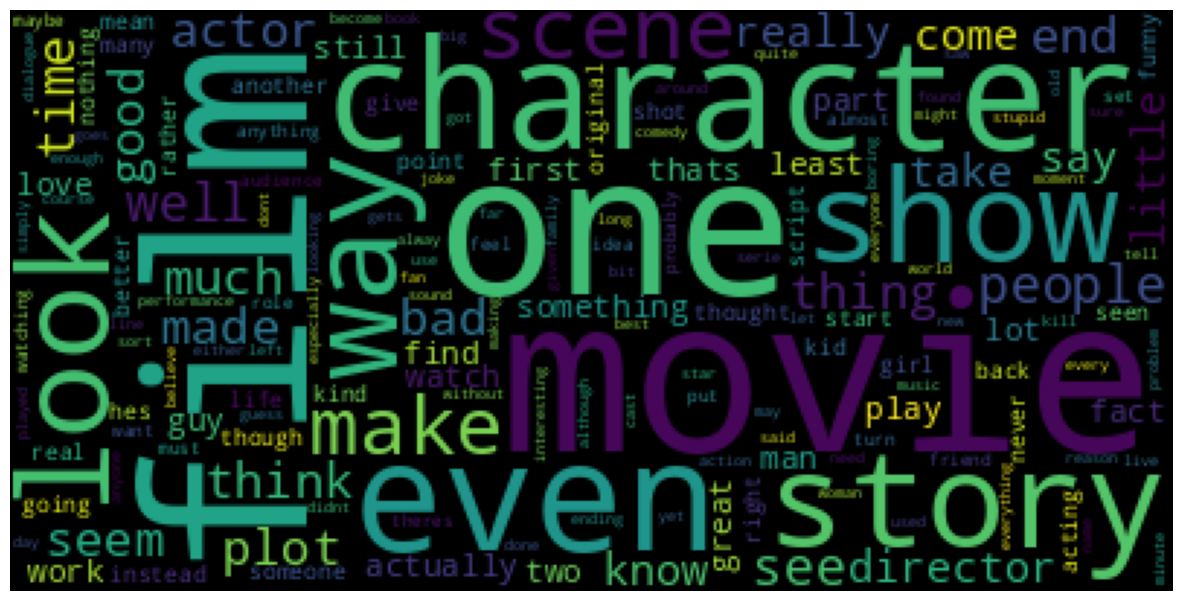

In [ ]:
# Word Cloud for Negative Sentiment
plt.figure(figsize = (15, 10))
wc = WordCloud(max_words = 500, background_color = 'black')
wc.generate(' '.join(word for word in df.loc[df['label'] == 'negative', 'final2']))
plt.imshow(wc)
plt.axis('off')
plt.show()

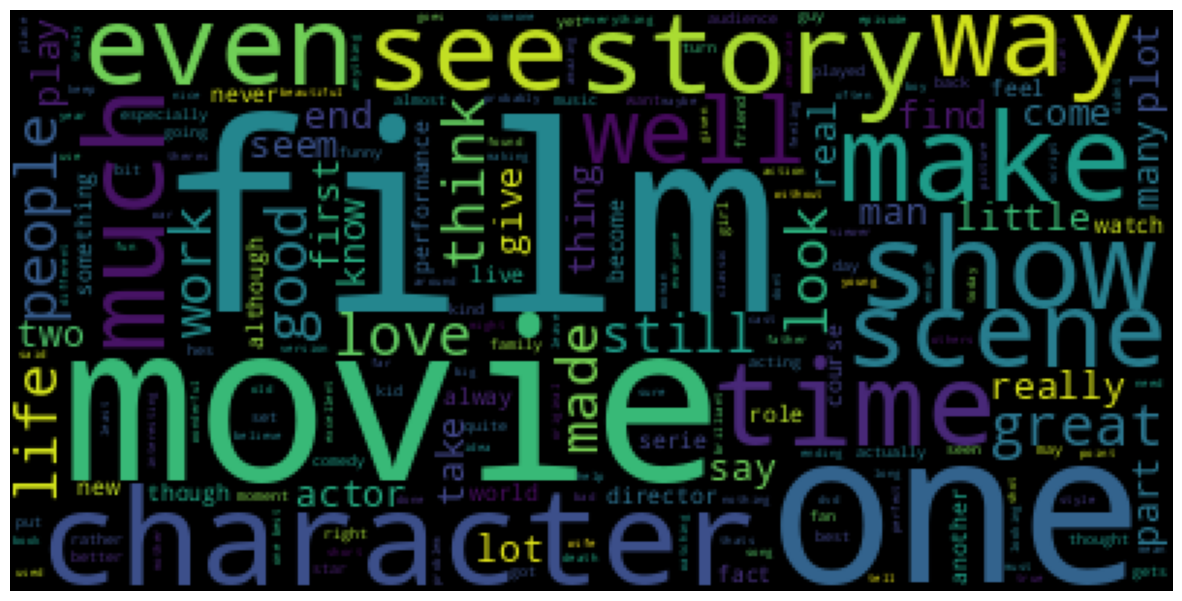

In [ ]:
# Word Cloud for Positive Sentiment
plt.figure(figsize = (15, 10))
wc = WordCloud(max_words = 500, background_color = 'black')
wc.generate(' '.join(word for word in df.loc[df['label'] == 'positive','final2']))
plt.imshow(wc)
plt.axis('off')
plt.show()

Separate Variable

In [ ]:
# Separate The Variables in The Dataset Into Independent Variables and Dependent Variable
X = df['final2']
y = df['label']

Encoder

In [ ]:
label = preprocessing.LabelEncoder()
label.fit(y)
y = label.transform(y)

Split The Dataset

In [ ]:
# Split The Dataset Into Training Set (75%) and Testing Set (25%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 105)

# Modelling

In [ ]:
pipe = Pipeline([('bow', CountVectorizer()),('tfidf', TfidfTransformer()),('model', LogisticRegression())])

# Train Model
pipe.fit(X_train, y_train)

# Predict Model
y_pred = pipe.predict(X_test)

# Evaluate Model
print('EVALUATION MODEL')
print(confusion_matrix(y_test, y_pred, labels = [0, 1]))
print(classification_report(y_test, y_pred, labels = [0, 1]))
print('\nAccuracy Score: ', accuracy_score(y_test, y_pred))

EVALUATION MODEL
[[4391  603]
 [ 501 4505]]
              precision    recall  f1-score   support

           0       0.90      0.88      0.89      4994
           1       0.88      0.90      0.89      5006

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000


Accuracy Score:  0.8896


In [ ]:
y_pred = label.inverse_transform(y_pred)
y_test = label.inverse_transform(y_test)

result = pd.DataFrame({'Test' : X_test[20 : 30], 'Prediction' : y_pred[20 : 30], 'Actual' : y_test[20 : 30]})
result.head()

,Test,Prediction,Actual
33107,four great movie depicting vietnam war particu...,positive,positive
32201,yesterday seen second part must say actually b...,negative,negative
10531,overall found film good exceptional acting dis...,positive,positive
23194,allowed write words film one word could suffic...,negative,negative
24405,really far worst movie ive ever seen whole lif...,negative,negative


# Prediction Sentiment Using Input from User

In [ ]:
demo = input("Input Comment: ")
demo = [demo]

pipe = Pipeline([('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),('model', LogisticRegression())])
pipe.fit(X_train, y_train)
y_pred = pipe.predict(demo)
y_pred = label.inverse_transform(y_pred)

print("Result:", y_pred[0])

Input Comment: Good Movie
Result: positive
